In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from __future__ import division
import itertools
import copy
from collections import namedtuple

In [18]:
class RTree:
    def __init__(self, depth):
        self.levels = depth - 1  # do not count leaves
        self.num_leaves = 2 ** self.levels
        self.num_nodes = self.num_leaves - 1

    def train(self, data):
        N = len(data)
        TRIALS_PER_NODE = 20
        
        # initialize tree and go through nodes in order
        ix = 0
        self.node = [None, {'A': 0, 'B': N}]  # node indexing starts at 1
        self.leaf = []
        for level in xrange(0, self.levels):
            for k in xrange(0, 2 ** level):
                ix += 1
                # select greedily the best split per node over N trials
                best = {'err': 1e20, 'S': None}
                A = self.node[ix]['A']
                B = self.node[ix]['B']
                for n in xrange(0, TRIALS_PER_NODE):
                    S = int(np.floor(np.random.rand() * (A - B + 1)))
                    ml = data[A:S].mean()
                    mr = data[S:B].mean()
                    err = np.square(data[A:S] - ml).mean() + np.square(data[S:B] - mr).mean()
                    if err < best['err']:
                        best = {'err': err, 'S': S}
                # best split found :
                if level == self.levels - 1:
                    self.leaf.append(data[A:best['S']].mean())
                    self.leaf.append(data[best['S']:B].mean())
                    print self.leaf
                else:    
                    print 'node', ix, ':', A, B, best
                    self.node[ix]['S'] = S
                    self.node[2*ix] = {'A': A, 'B': S}
                    self.node[2*ix+1] = {'A': S, 'B': B}
        print "*",
    print
        
        

In [19]:
POINTS = 500
x = np.sin(np.arange(0, POINTS-1) * 2 * np.pi / POINTS)

t =RTree(2)
t.train(x)


[0.60995396705296778, -0.66349567110413499]
*


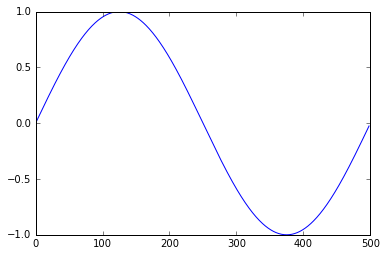

In [6]:
POINTS = 500
x = np.sin(np.arange(0, POINTS-1) * 2 * np.pi / POINTS)

plt.plot(x)